# Lists Analysis

In this notebook we are going to analyze the datasets.json file and the qrels file in order to retrieve some insights about the collection before downloading it. 

## Datasets.json file

We are going to analyze the datasets.json file in order to retrieve some insights: 
* Availability of each dataset field in the collection
* Number of download links for every dataset

In [1]:
import os
import json

In [2]:
#check the info for every dataset
dirname = os.path.dirname(__name__)
datasets_json_file = open(os.path.join(dirname, "../../files/datasets.json"), "r", encoding="utf-8")
datasets_json = json.load(datasets_json_file, strict = False)

In [3]:
#calculate how many times each dataset field is available in the collection

field_frequency = dict()
n_datasets = len(datasets_json["datasets"])

for dataset in datasets_json["datasets"]:
    for key in dataset.keys():
        if key not in field_frequency.keys():
            field_frequency[key] = 0
        
        if dataset[key] is not None and dataset[key]!="":
            field_frequency[key] += 1

field_percentage = dict()
for field in field_frequency:
    field_percentage[field] = field_frequency[field] / n_datasets * 100


In [4]:
print(field_frequency)
print(field_percentage)

{'license': 21362, 'download': 31589, 'size': 12536, 'author': 19375, 'created': 31532, 'dataset_id': 31589, 'description': 27244, 'title': 31589, 'version': 85, 'updated': 19265, 'tags': 21746}
{'license': 67.62480610339043, 'download': 100.0, 'size': 39.684700370382096, 'author': 61.33464180569186, 'created': 99.81955744088133, 'dataset_id': 100.0, 'description': 86.2452119408655, 'title': 100.0, 'version': 0.2690810092120675, 'updated': 60.98641932318212, 'tags': 68.84041913324258}


In [5]:
#number of links per dataset

n_links_datasets = dict()

for dataset in datasets_json["datasets"]:
    n_links = len(dataset["download"])

    if n_links not in n_links_datasets.keys():
        n_links_datasets[n_links] = 0
    
    n_links_datasets[n_links] += 1   

In [6]:
n_links_datasets = dict(sorted(n_links_datasets.items()))
print(n_links_datasets)

{1: 31094, 2: 303, 3: 24, 4: 28, 5: 35, 6: 15, 7: 7, 8: 5, 9: 2, 10: 2, 11: 1, 12: 9, 13: 7, 15: 7, 17: 2, 20: 2, 21: 16, 22: 6, 23: 1, 24: 3, 25: 2, 26: 2, 29: 3, 32: 1, 33: 1, 35: 2, 36: 1, 45: 1, 52: 1, 58: 1, 63: 2, 97: 1, 101: 1, 417: 1}


## QRELS

We are going to analyze:
* how many and which datasets are rated for every query
* the average number of rated datasets
* min and max number of rated datasets
* the distribution of the judged datasets

In [8]:
#qrels analysis

#calculate the number of rated datasets for each query

dirname = os.path.dirname(__name__)
qrels_file = open(os.path.join(dirname, "../../files/qrels.txt"), "r") 

query_datasets = dict()

while True:
    line = qrels_file.readline()

    if not line:
        break

    split = line.split("\t")

    query = split[0]
    dataset = split[2]

    if query not in query_datasets.keys():
        query_datasets[query] = dict()
        query_datasets[query]["list"] = list()
        query_datasets[query]["size"] = 0
    
    query_datasets[query]["list"].append(dataset)
    query_datasets[query]["size"] += 1





In [9]:
print(query_datasets)
print(len(query_datasets))


{'26': {'list': ['7456', '12513', '32867', '15781', '13349', '52742', '52743', '10280', '15144', '5897', '51785', '61802', '86253', '14509', '63763', '44979', '65814', '86166', '66075', '45691', '30620', '7453', '4989'], 'size': 23}, '138': {'list': ['44771', '44485', '12518', '44711', '49448', '10280', '35465', '2540', '75825', '38033', '37169', '43698', '5394', '44242', '43317', '34645', '6678', '53784', '7384', '44664'], 'size': 20}, '58': {'list': ['9921', '14979', '3590', '11656', '15176', '10828', '8783', '15632', '6994', '8534', '66778', '4445', '26274', '38124', '15601', '26226', '40757', '36085', '2358', '49654', '48375', '3575', '53754', '71418', '5500', '11837', '87871'], 'size': 27}, '13': {'list': ['25408', '15681', '73091', '33732', '55430', '73099', '51787', '9103', '4755', '8980', '4692', '24086', '2206', '4579', '44517', '10280', '73133', '12078', '10862', '24175', '8880', '4594', '12275', '73013', '73014', '68793', '24185'], 'size': 27}, '160': {'list': ['41793', '863

In [10]:
#calculate the average number of rated datasets for each query

n_rated_datasets = 0 
for query in query_datasets.keys():
    n_rated_datasets += query_datasets[query]["size"]

print(n_rated_datasets / len(query_datasets))

21.64503042596349


In [11]:
#calculate min and max number of rated datasets for each query

min = 100
max = 0
for query in query_datasets.keys():
    if query_datasets[query]["size"] < min:
        min = query_datasets[query]["size"]
    if query_datasets[query]["size"] > max:
        max = query_datasets[query]["size"]
     

In [12]:
print(min)
print(max)

10
36


In [13]:
#plot the distribution of rated datasets for each query

buckets = dict()

for query in query_datasets.keys():
    if query_datasets[query]["size"] not in buckets.keys():
        buckets[query_datasets[query]["size"]] = 0
    
    buckets[query_datasets[query]["size"]] += 1

In [14]:
print(buckets)

{23: 45, 20: 22, 27: 24, 11: 6, 25: 34, 16: 26, 17: 26, 10: 3, 19: 26, 13: 11, 18: 32, 26: 33, 21: 36, 15: 22, 22: 28, 12: 11, 14: 11, 31: 11, 24: 36, 30: 11, 28: 20, 29: 10, 32: 3, 33: 2, 34: 3, 36: 1}


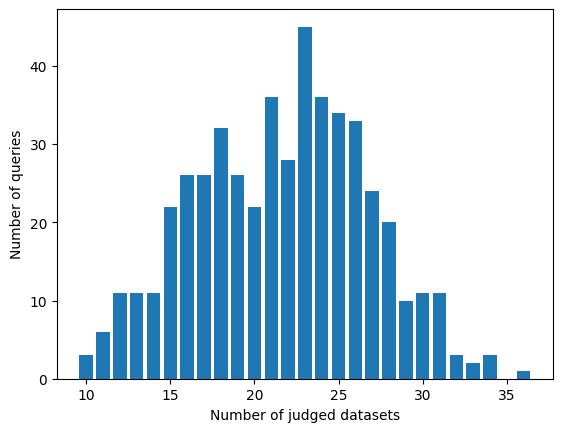

In [15]:
import matplotlib.pyplot as plt

# Extract keys and values from the dictionary
keys = list(buckets.keys())
values = list(buckets.values())

# Create a histogram
plt.bar(keys, values)

# Adding labels and title
plt.xlabel('Number of judged datasets')
plt.ylabel('Number of queries')

# Display the histogram
plt.show()